In [29]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

### Load in the data

In [13]:
raptor_data_all = pd.read_csv('../data/historical_RAPTOR_by_team.csv')

### Split the data into Playoff & Reg Season

In [6]:
regular_season_df = raptor_data_all[raptor_data_all['season_type']== 'RS']

### Get the players that played more than 300 mins

In [15]:
regular_season_df = regular_season_df[regular_season_df['mp']>300]

In [16]:
regular_season_df.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
3,Alaa Abdelnaby,abdelal01,1992,RS,POR,1948,934,-2.480005,-0.123125,-2.603129,0.070322,0.070322,0.0,-2.416858,-0.634025,-3.050883,0.466668
6,Alaa Abdelnaby,abdelal01,1993,RS,BOS,2304,1152,-1.845659,-2.038480,-3.884140,-0.669619,-0.669619,0.0,-1.804417,-1.907295,-3.711713,0.444865
8,Alaa Abdelnaby,abdelal01,1995,RS,SAC,926,476,-2.870680,-0.987076,-3.857756,-0.273787,-0.273787,0.0,-2.839132,-0.608234,-3.447366,1.665034
11,Kareem Abdul-Jabbar,abdulka01,1977,RS,LAL,6654,3016,4.267101,3.075579,7.342679,15.456216,15.456216,0.0,4.482404,2.556956,7.039361,-0.513828
13,Kareem Abdul-Jabbar,abdulka01,1978,RS,LAL,5064,2265,3.631396,3.605263,7.236659,11.478972,11.478972,0.0,4.130288,2.971010,7.101298,-0.577012


In [7]:
playoffs_df = raptor_data_all[raptor_data_all['season_type']== 'PO']

In [9]:
playoffs_df.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alaa Abdelnaby,abdelal01,1991,PO,POR,26,13,-6.565556,-1.999625,-8.565181,-0.039028,0.0,-0.039028,-6.966437,-4.170021,-11.136458,-1.785247
2,Alaa Abdelnaby,abdelal01,1992,PO,POR,50,25,-5.430838,-3.112862,-8.543700,-0.077215,0.0,-0.077215,-5.722269,-4.144577,-9.866847,1.216643
4,Alaa Abdelnaby,abdelal01,1993,PO,BOS,128,68,-9.774333,-3.596499,-13.370831,-0.381918,0.0,-0.381918,-9.480059,-4.481334,-13.961393,0.456135
10,Kareem Abdul-Jabbar,abdulka01,1977,PO,LAL,1020,467,6.350694,3.288313,9.639006,3.032039,0.0,3.032039,6.592019,3.065131,9.657150,-0.432080
12,Kareem Abdul-Jabbar,abdulka01,1978,PO,LAL,279,134,0.111106,0.124225,0.235331,0.209755,0.0,0.209755,0.572892,0.089969,0.662862,-0.369243


### Standardize the data

#### Drop the columns that aren't numeric

In [19]:
stats_only_reg = regular_season_df.drop(columns=['player_name','player_id','season_type','team','poss','mp','war_playoffs'])

In [20]:
standard_scaler = StandardScaler()

In [21]:
rescaled_reg_season = standard_scaler.fit_transform(stats_only_reg)

In [26]:
silhouette = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(rescaled_reg_season)
    
    centers = kmeans.cluster_centers_

    score = silhouette_score(rescaled_reg_season, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.32537356564358355
For n_clusters = 3, silhouette score is 0.23793896942648154
For n_clusters = 4, silhouette score is 0.21857765255329903
For n_clusters = 5, silhouette score is 0.19781890627155624
For n_clusters = 6, silhouette score is 0.19362881686500882
For n_clusters = 7, silhouette score is 0.18852837787858812
For n_clusters = 8, silhouette score is 0.18471672252552387
For n_clusters = 9, silhouette score is 0.17864128003268243
For n_clusters = 10, silhouette score is 0.18381422895050117
For n_clusters = 11, silhouette score is 0.1825096796221182
For n_clusters = 12, silhouette score is 0.1808635712307764
For n_clusters = 13, silhouette score is 0.18228501595346278
For n_clusters = 14, silhouette score is 0.17491339927264893
For n_clusters = 15, silhouette score is 0.17648815495161263
For n_clusters = 16, silhouette score is 0.1767332459717285
For n_clusters = 17, silhouette score is 0.1747883656753564
For n_clusters = 18, silhouette scor

In [27]:
silhouette_diff = []

for i in range(1, len(silhouette)):
    improvement = 1 - ((1 - silhouette[i]) / (1 - silhouette[i - 1]))
    silhouette_diff.append(improvement)
    print("For n_cluster = {}, percent improvement = {}".format(i + 2, improvement))

For n_cluster = 3, percent improvement = -0.1296044622095387
For n_cluster = 4, percent improvement = -0.02540651745256084
For n_cluster = 5, percent improvement = -0.026565334802072016
For n_cluster = 6, percent improvement = -0.0052233709312099474
For n_cluster = 7, percent improvement = -0.006325175171304265
For n_cluster = 8, percent improvement = -0.004697213370320474
For n_cluster = 9, percent improvement = -0.007451940522638312
For n_cluster = 10, percent improvement = 0.0062980385939344075
For n_cluster = 11, percent improvement = -0.0015983485312485168
For n_cluster = 12, percent improvement = -0.002013612088496375
For n_cluster = 13, percent improvement = 0.001735296676796727
For n_cluster = 14, percent improvement = -0.00901489739656558
For n_cluster = 15, percent improvement = 0.001908594416120013
For n_cluster = 16, percent improvement = 0.0002976168728956452
For n_cluster = 17, percent improvement = -0.002362393825398268
For n_cluster = 18, percent improvement = -0.001042

Text(0.5, 0.98, 'Finding the right number of clusters')

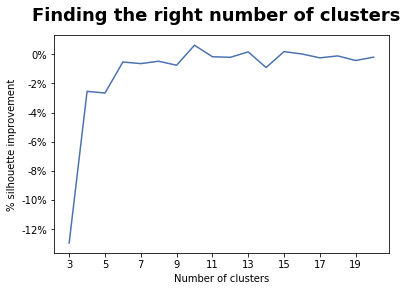

In [30]:
plt.style.use('seaborn-deep')

silhouette_imp_fig, ax = plt.subplots()

ax.plot(range(3, 21), silhouette_diff)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('% silhouette improvement')

ax.set_xticks(np.arange(3, 21, 2.0))

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

silhouette_imp_fig.suptitle("Finding the right number of clusters", weight = 'bold', size = 18)

In [65]:
kmeans = KMeans(n_clusters = 7)

kmeans.fit(rescaled_reg_season)

y_kmeans = kmeans.predict(rescaled_reg_season)
kmeans.fit(rescaled_reg_season)

y_kmeans = kmeans.predict(rescaled_reg_season)

In [102]:
regular_season_df.describe()

,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,clusters
count,14680.000000,14680.000000,14680.000000,14680.000000,14680.000000,14680.000000,14680.000000,14680.000000,14680.0,14680.000000,14680.000000,14680.000000,14680.000000,14680.000000
mean,1999.829428,3069.406812,1520.315123,-0.616791,-0.173381,-0.790171,2.209769,2.209769,0.0,-0.649844,-0.256988,-0.906832,0.097688,3.148501
std,12.226168,1654.796398,811.270916,2.331087,1.548314,2.912442,3.257512,3.257512,0.0,2.323328,1.570695,3.075999,0.542108,2.053914
min,1977.000000,550.000000,301.000000,-9.412040,-7.891169,-14.085189,-7.382978,-7.382978,0.0,-9.020575,-7.190238,-13.231709,-2.316375,0.000000
25%,1990.000000,1608.000000,801.000000,-2.171642,-1.207290,-2.717665,0.012809,0.012809,0.0,-2.207940,-1.298838,-3.018636,-0.248619,2.000000
50%,2001.000000,2902.000000,1442.000000,-0.702576,-0.283224,-0.883206,1.165430,1.165430,0.0,-0.761313,-0.356789,-1.032267,0.047752,3.000000
75%,2010.000000,4398.000000,2172.000000,0.817301,0.746490,1.049706,3.534105,3.534105,0.0,0.777895,0.713253,1.051222,0.401856,5.000000
max,2019.000000,8303.000000,3638.000000,11.072301,7.262922,13.862099,24.355978,24.355978,0.0,11.770319,6.899389,15.055155,4.045869,6.000000


In [66]:
regular_season_df['clusters'] = y_kmeans

In [67]:
season_2019 = regular_season_df[regular_season_df['season'] == 2019]

In [109]:
season_2019[season_2019['clusters'] == 6]

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,clusters
358,Kadeem Allen,allenka01,2019,RS,NYK,870,416,2.078138,-1.023795,1.054343,0.801391,0.801391,0.0,1.129783,-1.333298,-0.203515,-0.764299,6
863,Ryan Arcidiacono,arcidry01,2019,RS,CHI,4077,1961,-0.091056,-0.403091,-0.494146,2.227070,2.227070,0.0,-1.028347,-0.310010,-1.338357,-1.350893,6
909,Trevor Ariza,arizatr01,2019,RS,PHO,1856,884,-1.445941,-2.092738,-3.538678,-0.355141,-0.355141,0.0,-1.016009,-1.240490,-2.256499,-0.162205,6
910,Trevor Ariza,arizatr01,2019,RS,WAS,3122,1465,0.512549,-1.910558,-1.398009,1.014975,1.014975,0.0,0.663968,-1.607899,-0.943931,0.447631,6
1144,D.J. Augustin,augusdj01,2019,RS,ORL,4674,2269,2.177378,-2.328800,-0.151422,2.969703,2.969703,0.0,1.138018,-2.084138,-0.946120,-1.305144,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26502,Johnathan Williams,willijo04,2019,RS,LAL,793,372,-0.792989,-1.358993,-2.151982,0.113039,0.113039,0.0,-1.735585,-1.147538,-2.883124,-0.414167,6
26594,Lou Williams,willilo02,2019,RS,LAC,4388,1993,5.114451,-3.697212,1.417240,4.304897,4.304897,0.0,4.042942,-4.405614,-0.362673,1.624138,6
26635,Marvin Williams,willima02,2019,RS,CHA,4432,2133,-1.204919,-0.813567,-2.018486,0.791987,0.791987,0.0,-0.917166,-0.765214,-1.682380,-0.523381,6
27316,Trae Young,youngtr01,2019,RS,ATL,5516,2503,2.396499,-4.517486,-2.120987,0.817245,0.817245,0.0,2.795597,-4.777071,-1.981475,1.773287,6


In [78]:
regular_season_df

,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,clusters
season,1.000000,-0.158281,-0.100084,0.011112,0.020257,0.019663,-0.032154,-0.032154,NaN,0.013920,0.016945,0.019166,-0.049057,0.539342
poss,-0.158281,1.000000,0.992593,0.551905,0.233338,0.565787,0.708932,0.708932,NaN,0.580418,0.341151,0.612596,-0.360996,0.001411
mp,-0.100084,0.992593,1.000000,0.557450,0.240529,0.574047,0.717930,0.717930,NaN,0.586075,0.349250,0.621005,-0.371464,0.035352
raptor_offense,0.011112,0.551905,0.557450,1.000000,0.090195,0.848339,0.783410,0.783410,NaN,0.988552,0.178074,0.837591,-0.229925,0.114457
raptor_defense,0.020257,0.233338,0.240529,0.090195,1.000000,0.603812,0.487503,0.487503,NaN,0.126571,0.958913,0.585249,-0.064536,0.083593
raptor_total,0.019663,0.565787,0.574047,0.848339,0.603812,1.000000,0.886200,0.886200,NaN,0.858514,0.652306,0.981530,-0.218338,0.136049
war_total,-0.032154,0.708932,0.717930,0.783410,0.487503,0.886200,1.000000,1.000000,NaN,0.806093,0.552406,0.890924,-0.246737,0.018741
war_reg_season,-0.032154,0.708932,0.717930,0.783410,0.487503,0.886200,1.000000,1.000000,NaN,0.806093,0.552406,0.890924,-0.246737,0.018741
war_playoffs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
predator_offense,0.013920,0.580418,0.586075,0.988552,0.126571,0.858514,0.806093,0.806093,NaN,1.000000,0.218790,0.867029,-0.202079,0.112750


In [94]:
season_2019 = regular_season_df[regular_season_df['season'] == 2019]

In [100]:
teams_and_clusters = season_2019.groupby(['team','clusters']).count()['player_name']

In [110]:
teams_and_clusters.head(50)

team  clusters
ATL   2            3
      3            4
      4            1
      5            2
      6            4
BOS   1            1
      3            2
      5            4
      6            5
BRK   2            1
      3            2
      4            2
      5            6
      6            2
CHA   1            1
      2            2
      4            1
      5            2
      6            8
CHI   2            5
      3            2
      4            1
      5            2
      6            7
CLE   2            3
      5            4
      6           10
DAL   2            1
      3            2
      4            2
      5            2
      6           10
DEN   1            1
      2            1
      4            2
      5            1
      6            6
DET   1            2
      2            2
      3            4
      5            2
      6            5
GSW   1            2
      3            1
      4            1
      5            4
      6            

In [92]:
cluster_1[cluster_1['season'] == 2018]

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,clusters
310,LaMarcus Aldridge,aldrila01,2018,RS,SAS,4948,2509,2.619060,1.451787,4.070846,8.582587,8.582587,0.0,2.424558,1.672045,4.096603,-1.689636,1
765,Giannis Antetokounmpo,antetgi01,2018,RS,MIL,5604,2756,3.172226,2.454034,5.626260,11.791367,11.791367,0.0,3.381661,2.436835,5.818496,0.112979,1
1818,Bradley Beal,bealbr01,2018,RS,WAS,6067,2977,2.480438,0.916278,3.396716,9.351199,9.351199,0.0,2.892919,0.638455,3.531374,0.161126,1
2365,Eric Bledsoe,bledser01,2018,RS,MIL,4578,2239,2.932285,2.052632,4.984917,8.927123,8.927123,0.0,3.241510,2.399500,5.641010,1.024250,1
3736,Jimmy Butler,butleji01,2018,RS,MIN,4317,2164,5.538102,2.283114,7.821216,11.503876,11.503876,0.0,4.829191,2.487677,7.316868,-1.423733,1
5265,Robert Covington,covinro01,2018,RS,PHI,5350,2532,1.253345,3.608153,4.861498,9.907442,9.907442,0.0,1.931786,4.282504,6.214291,0.753685,1
5619,Stephen Curry,curryst01,2018,RS,GSW,3565,1631,9.182645,-1.655315,7.527331,8.773362,8.773362,0.0,9.370976,-0.732634,8.638343,2.565977,1
5842,Anthony Davis,davisan02,2018,RS,NOP,5835,2727,1.532898,3.833470,5.366368,11.425565,11.425565,0.0,2.943078,3.592509,6.535587,1.169516,1
8717,Paul George,georgpa01,2018,RS,OKC,5977,2891,1.590979,1.537340,3.128319,8.825870,8.825870,0.0,2.400286,2.574273,4.974558,1.778100,1
10010,James Harden,hardeja01,2018,RS,HOU,5224,2551,9.127370,1.151305,10.278675,17.048015,17.048015,0.0,9.910777,1.079184,10.989961,0.531938,1
